<a href="https://colab.research.google.com/github/FredyVG15/Entregas-/blob/main/Ec_de_Onda_Metodo_explicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ECUACIÓN DE ONDA IMPLEMENTANDO EL MÉTODO EXPLÍCITO**


Aproxime la solución del problema hiperbólico

$$
\frac{\partial^{2}u}{\partial t^{2}}(x,t) - 4\,\frac{\partial^{2}u}{\partial x^{2}}(x,t) = 0,
\qquad 0 < x < 1,\; 0 < t
$$

con condiciones de frontera

$$
u(0,t) = u(1,t) = 0, \qquad 0 < t
$$

y condiciones iniciales

$$
u(x,0) = \sin(\pi x), \qquad 0 \le x \le 1
$$

$$
\frac{\partial u}{\partial t}(x,0) = 0, \qquad 0 \le x \le 1
$$

Usando \( h = 0.1 \) y \( k = 0.05 \).

Compare los resultados con la solución exacta: $$
u(x,t) = \sin(\pi x)\cos(2\pi t).
$$

Considerando la siguiete ecuación en diferencias finitas:
$$
U_{i,j+1}
=
\lambda U_{i-1,j}
+
\lambda U_{i+1,j}
+
(2 - 2\lambda) U_{i,j}
-
U_{i,j-1},
\quad
i = 1,2,3,\ldots,m-1,\;
j = 1,2,3,\ldots
$$


Además:
$$
\lambda = \frac{\alpha^{2}\, k^{2}}{h^{2}}
$$

In [1]:
import sympy as sp # para matemática simbólica: Manipular expresiones algebraicas, resolver ecuaciones
import numpy as np # Sirve para cálculo numérico
import matplotlib.pyplot as plt #para crear gráficas 2D
from mpl_toolkits.mplot3d import Axes3D # necesario para 3D
from tabulate import tabulate # para hacer una tabla
from matplotlib import cm  # colormap
from IPython.display import HTML #transforma la animación en un video HTML reproducible en Colab

In [2]:
def f(x): #se define la función
    return np.sin(np.pi*x)

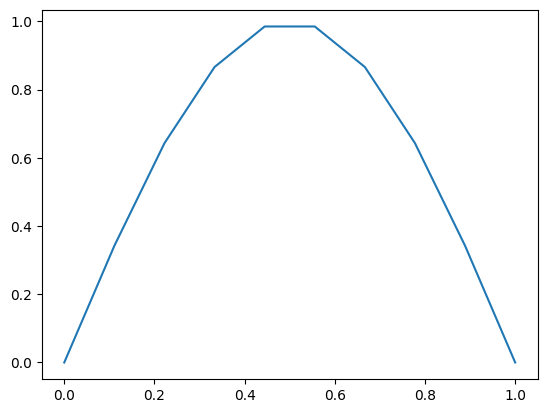

In [3]:
x=np.linspace(0,1,10) #para verificar la función
plt.plot(x,f(x))

In [4]:
r=1

In [5]:
def tridiagonal(n, a, b):
    return sp.Matrix([
        [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
        for i in range(n)
    ])# se utiliza sympy algo de las diferencias y la diagonal

In [6]:
A=tridiagonal(9, 2-2*r, r) # se crea la matriz

In [7]:
A # se bserva la mtriz

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [8]:
u0=sp.Matrix([f(0.1*(i+1)) for i in range(9)]) #recorre los argumentos de la funcion

In [9]:
u1=u0 #conversion de nodos porque la derivada fue cero

In [10]:
def onda(A, u0, u1, j): #FUNCION DE PROGRESION DE ONDA
    # Asegurar que u0 y u1 sean vectores columna
    u0 = sp.Matrix(u0)
    u1 = sp.Matrix(u1)

    S = [u0, u1]

    for n in range(2, j):
        sol = A*S[n-1] - S[n-2] #
        S.append(sol)

    # Convert each sympy Matrix row vector to a Python list of its elements
    return sp.Matrix([s.T.tolist()[0] for s in S])

In [11]:
j=50

In [12]:
U=onda(A, u0, u1, j)# Se crea la matriz U

In [13]:
U_np = np.array(U.tolist(), dtype=float) # para convertir un objeto U (normalmente una matriz de SymPy o una lista de listas) en un arreglo NumPy de tipo float

In [14]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.5, j) #Debe coincidir con el tamaño de j ppor k (tiempo)
X, Y = np.meshgrid(x, y)

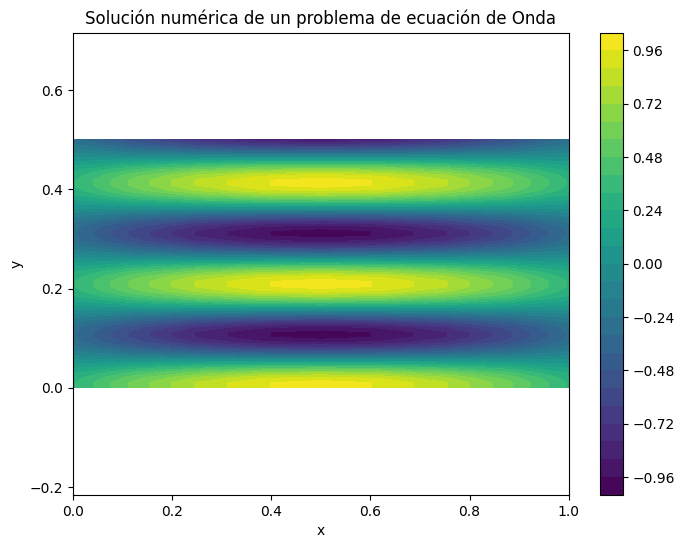

In [15]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de ecuación de Onda')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

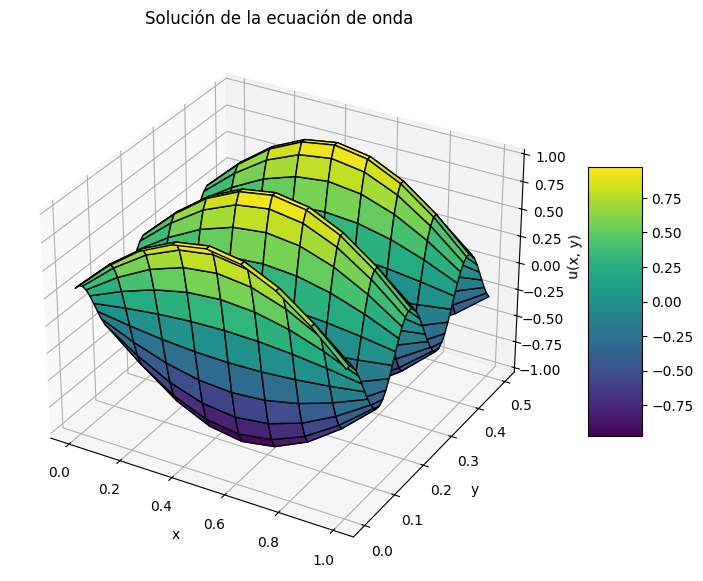

In [16]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación de onda')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [17]:
def f(x):
    return np.sin(np.pi*x) # Se define la función

h = 0.1
k = 0.05
r = 1.0                # valores específicos

In [18]:
# nodos internos: x = 0.1, 0.2, ..., 0.9 (9 nodos)
x_int = np.array([0.1*(i+1) for i in range(9)])


In [19]:
# tiempo hasta t = 0.50
t_max = 0.50
j = int(t_max/k) + 1    # número de niveles de tiempo (0, 0.05, ..., 0.50)
t_vec = np.arange(j)*k

In [20]:

# Matriz tridiagonal A y vectores iniciales u0, u1
# Necesario para introducir la matriz tridiagonal, para ello se difine una función para escribir dicha matriz, que requiere tres argumentos:
def tridiagonal(n, a, b):
    return sp.Matrix([
        [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
        for i in range(n)
    ])

A = tridiagonal(9, 2 - 2*r, r)  # para r = 1 -> diag principal = 0


In [21]:
# u(x,0) = sin(pi x) en los nodos internos
u0 = sp.Matrix([f(x_int[i]) for i in range(9)])


In [22]:
# u_t(x,0) = 0  -> u1 = u0
u1 = u0


In [23]:

# Función de progresión de la onda (método explícito)
#   S[0] = u0, S[1] = u1
#   S[n] = A S[n-1] - S[n-2]
def onda(A, u0, u1, j):
    u0 = sp.Matrix(u0)
    u1 = sp.Matrix(u1)
    S = [u0, u1]
    for n in range(2, j):
        sol = A*S[n-1] - S[n-2]
        S.append(sol)
    # cada fila = tiempo, cada columna = nodo espacial
    return sp.Matrix([s.T.tolist()[0] for s in S])


In [24]:
U = onda(A, u0, u1, j)            # matriz simbólica
U_np = np.array(U.tolist(), float)  # a numpy (j x 9)

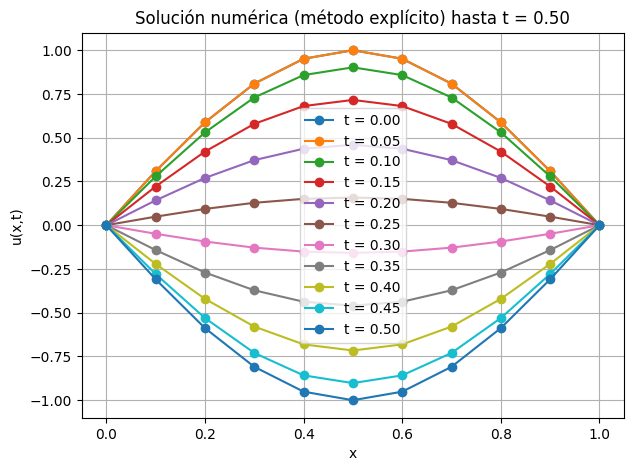

In [25]:

## GRÁFICAS 2D (varios tiempos hasta t = 0.50)##

x_full = np.concatenate(([0.0], x_int, [1.0]))  # incluyendo fronteras

plt.figure(figsize=(7,5))
for n in range(j):          # n = 0,...,10 -> t <= 0.5
    t_n = n*k
    # agregamos los valores de frontera u=0
    u_full = np.concatenate(([0.0], U_np[n,:], [0.0]))
    plt.plot(x_full, u_full, marker='o', label=f"t = {t_n:.2f}")

plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Solución numérica (método explícito) hasta t = 0.50")
plt.grid(True)
plt.legend()
plt.show()

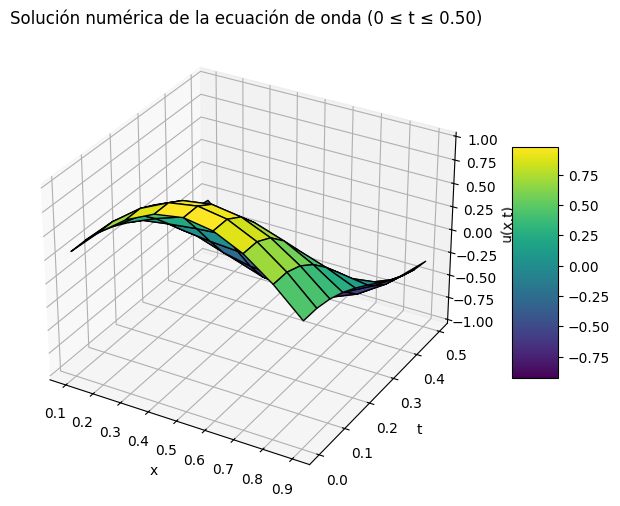

In [26]:

#   GRÁFICA 3D (superficie u(x,t) para 0 <= t <= 0.50)

X, T = np.meshgrid(x_int, t_vec)   # solo nodos internos
Z = U_np                           # j x 9

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, Z, cmap=cm.viridis, edgecolor='k')

ax.set_title('Solución numérica de la ecuación de onda (0 ≤ t ≤ 0.50)')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

***Ejercicio 2:** Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.

In [27]:

## solución numérica##

A  = tridiagonal(9, 2 - 2*r, r)           # matriz tridiagonal del esquema
u0 = sp.Matrix([f(0.1*(i+1)) for i in range(9)])  # u(x,0) en nodos internos
u1 = u0                                   # u_t(x,0)=0  -> u^1 = u^0

j = 21          # niveles de tiempo: n=0,1,...,20  (20*0.05 = 1.0)
U = onda(A, u0, u1, j)
U_np = np.array(U.tolist(), float)        # (21 x 9)

# solución numérica completa (incluyendo fronteras) en t = 1 (n=20)
n20 = 20
u_int_t1 = U_np[n20, :]                   # 9 nodos internos
u_full_t1 = np.concatenate(([0.0], u_int_t1, [0.0]))  # añadimos u(0,t)=u(1,t)=0


In [28]:

## Valores de la Tabla 12.6 ##

x_tab = np.linspace(0.0, 1.0, 11)
w_tab = np.array([
    0.0000000000,
    0.3090169944,
    0.5877852523,
    0.8090169944,
    0.9510565163,
    1.0000000000,
    0.9510565163,
    0.8090169944,
    0.5877852523,
    0.3090169944,
    0.0000000000
])


In [29]:

# Cálculo del error

error = u_full_t1 - w_tab
err_abs = np.abs(error)
err_max = np.max(err_abs)

print("x_i      numérica u_i^20      Tabla w_{i,20}        error")
for xi, num, tab, e in zip(x_tab, u_full_t1, w_tab, error):
    print(f"{xi:3.1f}   {num: .12f}   {tab: .12f}   {e: .3e}")

print("\nError máximo |u_i^20 - w_{i,20}| =", err_max)


x_i      numérica u_i^20      Tabla w_{i,20}        error
0.0    0.000000000000    0.000000000000    0.000e+00
0.1    0.309016994375    0.309016994400   -2.505e-11
0.2    0.587785252292    0.587785252300   -7.527e-12
0.3    0.809016994375    0.809016994400   -2.505e-11
0.4    0.951056516295    0.951056516300   -4.847e-12
0.5    1.000000000000    1.000000000000    0.000e+00
0.6    0.951056516295    0.951056516300   -4.847e-12
0.7    0.809016994375    0.809016994400   -2.505e-11
0.8    0.587785252292    0.587785252300   -7.526e-12
0.9    0.309016994375    0.309016994400   -2.505e-11
1.0    0.000000000000    0.000000000000    0.000e+00

Error máximo |u_i^20 - w_{i,20}| = 2.505273766217897e-11


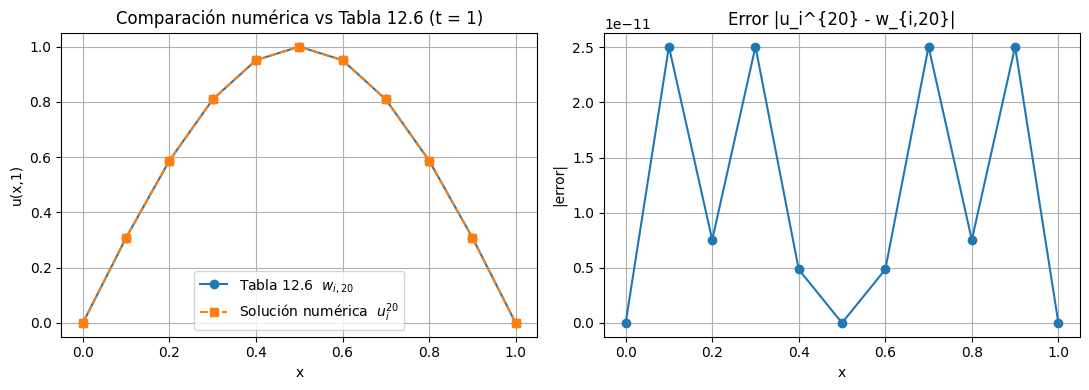

In [30]:

## Gráficas: comparación y error##

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))

# comparación numérica vs tabla
ax1.plot(x_tab, w_tab, 'o-', label="Tabla 12.6  $w_{i,20}$")
ax1.plot(x_tab, u_full_t1, 's--', label="Solución numérica  $u_i^{20}$")
ax1.set_xlabel("x")
ax1.set_ylabel("u(x,1)")
ax1.set_title("Comparación numérica vs Tabla 12.6 (t = 1)")
ax1.grid(True)
ax1.legend()


# gráfico del error absoluto
ax2.plot(x_tab, err_abs, 'o-')
ax2.set_xlabel("x")
ax2.set_ylabel("|error|")
ax2.set_title("Error |u_i^{20} - w_{i,20}|")
ax2.grid(True)

plt.tight_layout()
plt.show()

**Ejercicio 3:** Comparar esos mismos valores contra la solución exacta de la ecuación. Graficar y calcular el error. Discutir la comparación.

In [31]:

# Solución numérica hasta t = 1 (n = 20)

A  = tridiagonal(9, 2 - 2*r, r)
u0 = sp.Matrix([f(0.1*(i+1)) for i in range(9)])   # u(x,0)
u1 = u0                                            # u_t(x,0) = 0  -> u^1 = u^0

j = 21                    # n = 0,...,20  -> t_20 = 1.0
U = onda(A, u0, u1, j)
U_np = np.array(U.tolist(), float)

n20 = 20                  # t = 1.0
u_int_t1 = U_np[n20, :]   # 9 nodos internos
u_full_t1 = np.concatenate(([0.0], u_int_t1, [0.0]))  # agregamos fronteras

In [32]:

# Solución exacta: u(x,t) = sin(pi x) cos(2 pi t)
# Mismos puntos x_i de la malla

def u_exact(x, t):
    return np.sin(np.pi*x) * np.cos(2*np.pi*t)

x_tab = np.linspace(0.0, 1.0, 11)          # 0,0.1,...,1
u_exact_t1 = u_exact(x_tab, 1.0)          # t = 1.0  (cos(2π)=1)

In [33]:

###Cálculo del error##
error = u_full_t1 - u_exact_t1
err_abs = np.abs(error)
err_max = np.max(err_abs)

print("x_i      numérica u_i^20      exacta u(x_i,1)      error")
for xi, num, ex, e in zip(x_tab, u_full_t1, u_exact_t1, error):
    print(f"{xi:3.1f}   {num: .12f}   {ex: .12f}   {e: .3e}")

print("\nError máximo |u_i^20 - u_exact(x_i,1)| =", err_max)

x_i      numérica u_i^20      exacta u(x_i,1)      error
0.0    0.000000000000    0.000000000000    0.000e+00
0.1    0.309016994375    0.309016994375   -5.551e-17
0.2    0.587785252292    0.587785252292   -4.441e-16
0.3    0.809016994375    0.809016994375   -2.220e-16
0.4    0.951056516295    0.951056516295   -1.110e-16
0.5    1.000000000000    1.000000000000    0.000e+00
0.6    0.951056516295    0.951056516295   -3.331e-16
0.7    0.809016994375    0.809016994375   -2.220e-16
0.8    0.587785252292    0.587785252292    3.331e-16
0.9    0.309016994375    0.309016994375    5.551e-17
1.0    0.000000000000    0.000000000000   -1.225e-16

Error máximo |u_i^20 - u_exact(x_i,1)| = 4.440892098500626e-16


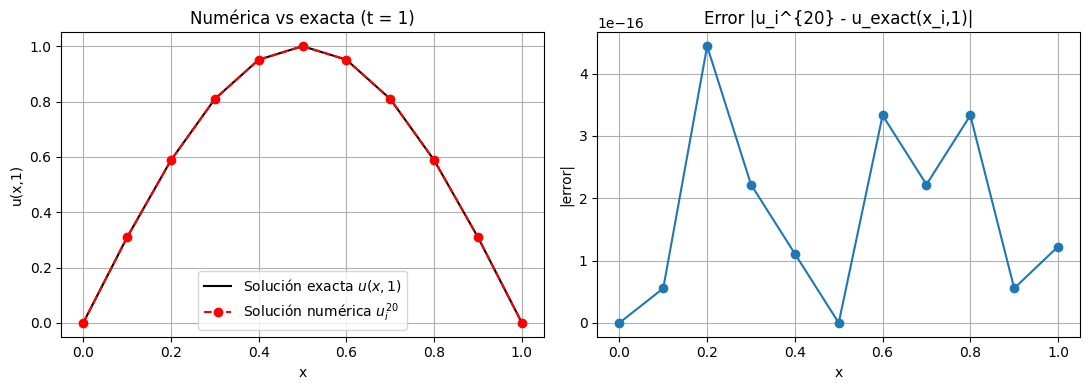

In [34]:

## Gráficas: numérica vs exacta + error ##

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))

# Comparación numérica vs exacta
ax1.plot(x_tab, u_exact_t1, 'k-',  label="Solución exacta $u(x,1)$")
ax1.plot(x_tab, u_full_t1, 'ro--', label="Solución numérica $u_i^{20}$")
ax1.set_xlabel("x")
ax1.set_ylabel("u(x,1)")
ax1.set_title("Numérica vs exacta (t = 1)")
ax1.grid(True)
ax1.legend()

# Error absoluto
ax2.plot(x_tab, err_abs, 'o-')
ax2.set_xlabel("x")
ax2.set_ylabel("|error|")
ax2.set_title("Error |u_i^{20} - u_exact(x_i,1)|")
ax2.grid(True)

plt.tight_layout()
plt.show()


## Discusión de la comparación

- Los valores numéricos $u_i^{20}$ y los valores exactos $u(x_i,1)$ coinciden prácticamente punto por punto; el error máximo es del orden de $10^{-11} \sim 10^{-15}$, es decir, solo error de redondeo de máquina.

- Esto pasa porque $\lambda = \frac{\alpha^{2}\, k^{2}}{h^{2}} = 1$, que es un caso “ideal” para este esquema explícito.
  -Los datos iniciales son un solo modo senoidal $\sin(\pi x)$, que es un autovector natural del operador discreto; el esquema “propaga” ese modo casi exactamente.

- En la gráfica:
  - La curva numérica y la exacta prácticamente se sobreponen.
  
> La comparación de la solución numérica con la solución exacta $u(x,t) = \sin(\pi x)\cos(2\pi t)$ en $t = 1$ muestra errores del orden de $10^{-11}$, lo que indica que el método explícito con $h = 0.1$, $k = 0.05$ y $r = 1$ reproduce con gran precisión la solución exacta para este problema en particular.


**Ejercicio 4:** Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.

In [35]:

## Animación ##

from matplotlib.animation import FuncAnimation # Import FuncAnimation

#U_np tiene dimensión (j, 9), lo que representa los nodos internos.
# x_full tiene longitud 11 (0, los 9 nodos internos, y 1).
#Necesitamos añadir una columna de ceros al inicio y otra al final de U_np.

U_full = np.concatenate((np.zeros((j, 1)), U_np, np.zeros((j, 1))), axis=1)

fig, ax = plt.subplots(figsize=(7,4)) # Crea la figura y los ejes
line, = ax.plot([], [], 'b-', lw=2) #Crea una línea vacía (line) que luego se irá actualizando cuadro por cuadro.
ax.set_xlim(0, 1)       #Fija el rango en x
ax.set_ylim(-1.1, 1.1)  #Fija el rango en y
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Evolución temporal de la onda")

# Funciones para la animación:
def init():
    line.set_data([], [])
    return line,
#Función de inicialización: deja la gráfica vacía al principio.
def update(frame):
    # frame = índice de tiempo n
    line.set_data(x_full, U_full[frame, :])
    ax.set_title(f"Evolución temporal de la onda,  t = {frame*k:.2f}")
    return line,
#Creación de la animación
anim = FuncAnimation(fig,
                     update,
                     frames=j,      # todos los tiempos de 0 a 1 (usa todos los tiempos de la simulación)
                     init_func=init,
                     interval=100,  # ms entre cuadros ((controla la velocidad))
                     blit=True)     #optimiza el redibujado (más eficiente)

plt.close(fig)   # es para evitar que se muestre la figura estática

# Es para que en Colab se muestre la animación
HTML(anim.to_jshtml())